# Hola &#x1F600;,

Soy **Hesus Garcia** – , tu revisor de confianza, también conocido como **"El Hesus que lleva la H de 'héroe' del código" 🦸‍♂️**. Sí, soy el único Hesus con H que te ayudará a llevar tu trabajo al siguiente nivel. Estoy preparado con observaciones y sugerencias que harán que tu proyecto destaque y esté a la altura de las mejores prácticas en desarrollo. ¡Prepárate para mejorar y brillar en el mundo del código! 🚀

Cada vez que encuentre un detalle importante en tu código, te lo señalaré para que puedas corregirlo y así te prepares para un ambiente de trabajo real, donde el líder de tu equipo actuaría de manera similar. Si en algún momento no logras solucionar el problema, te daré más detalles para ayudarte en nuestra próxima oportunidad de revisión.

Es importante que cuando encuentres un comentario, **no los muevas, no los modifiques, ni los borres**.

---

### Formato de Comentarios

Revisaré cuidadosamente cada implementación en tu notebook para asegurar que cumpla con los requisitos y te daré comentarios de acuerdo al siguiente formato:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Éxito</b> - ¡Excelente trabajo! Esta parte está bien implementada y contribuye significativamente al análisis de datos o al proyecto. Continúa aplicando estas buenas prácticas en futuras secciones.
    
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Atención</b> ⚠️ - Este código está correcto, pero se puede optimizar. Considera implementar mejoras para que sea más eficiente y fácil de leer. Esto fortalecerá la calidad de tu proyecto.
    
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>A resolver</b> ❗ - Aquí hay un problema o error en el código que es necesario corregir para aprobar esta sección. Por favor, revisa y corrige este punto, ya que es fundamental para la validez del análisis y la precisión de los resultados.
    
</div>

---

Al final de cada revisión, recibirás un **Comentario General del Revisor** que incluirá:

- **Aspectos positivos:** Un resumen de los puntos fuertes de tu proyecto.
- **Áreas de mejora:** Sugerencias sobre aspectos donde puedes mejorar.
- **Temas adicionales para investigar:** Ideas de temas opcionales que puedes explorar por tu cuenta para desarrollar aún más tus habilidades.

Estos temas adicionales no son obligatorios en esta etapa, pero pueden serte útiles para profundizar en el futuro.

--- 

Esta estructura en viñetas facilita la lectura y comprensión de cada parte del comentario final.

También puedes responderme de la siguiente manera si tienes alguna duda o quieres aclarar algo específico:


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Aquí puedes escribir tu respuesta o pregunta sobre el comentario.
    
</div>


In [1]:
#----------------------Importacion de todas las librerías necesarias
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import math
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

# Revision y limpieza de los datos

Se hara la carga de los tres archivos de datos: data_0, data_1 y data_2, nombrados aqui como geo_0, geo_1 y geo_2, que n referencia a los datos de las tres regiones de la compañía de extracción de petróleo OilyGiant. Cada uno de los archivos contiene cuatro columnas: id, f0,f1 yf2. Id no da informacion especifica, solo es la etiqueta a cada descripcion. Las columnas f1 son caracteristicas de cada uno de los pozos, sin informacion estra.

In [2]:
#-------------------------Carga de los datos
geo_0 = pd.read_csv('/datasets/geo_data_0.csv')
geo_1 = pd.read_csv('/datasets/geo_data_1.csv')
geo_2 = pd.read_csv('/datasets/geo_data_2.csv')

Se hara una revison del estado de los datos, para determinar si hay valores nulos, duplicados, tipos incorrectos. De la misma manera, se analizara la distribicion de los datos de cada region 

In [3]:
#---------------------Exploracion de los datos
print('Region 1')
geo_0.info()
print('--------------------------------------------------------------------------')
print('Region 2')
geo_1.info()
print('--------------------------------------------------------------------------')
print('Region 3')
geo_2.info()

Region 1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
--------------------------------------------------------------------------
Region 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
---------------------------------------

En cada una de las regiones, los tipos de datos corresponden con lo esperado.

In [4]:
print('Region 1')
geo_0.describe()

Region 1


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


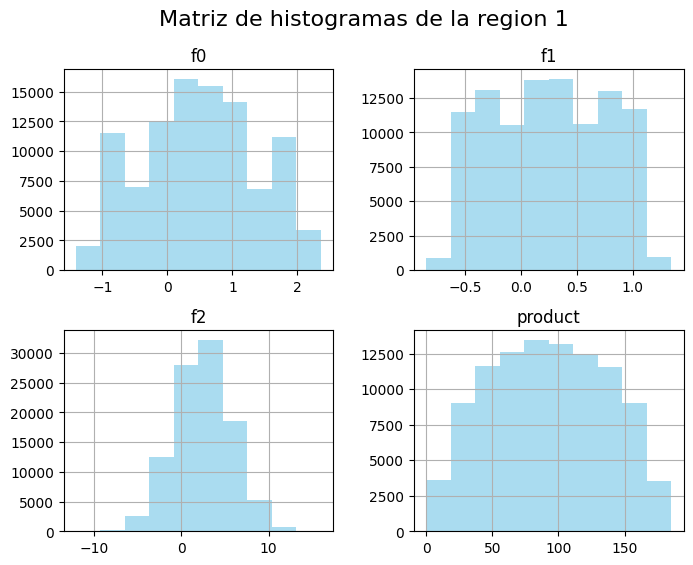

In [5]:
geo_0.hist(figsize=(8, 6), bins=10, color='skyblue', alpha=0.7)
plt.suptitle('Matriz de histogramas de la region 1', fontsize=16)  # Título global
plt.show()

En un analisis exploratorio de un histograma de frecuencias de las columnas f0, f1, f2 y product, de cada una de las regiones,  la region 1, en las cuatro graficas. Hay un ligero sesgo positivo en todas las variables, excepto en f1. Las distribuciones de f2 y product, son similares a la normal.

In [6]:
print('Region 2')
geo_1.describe()

Region 2


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


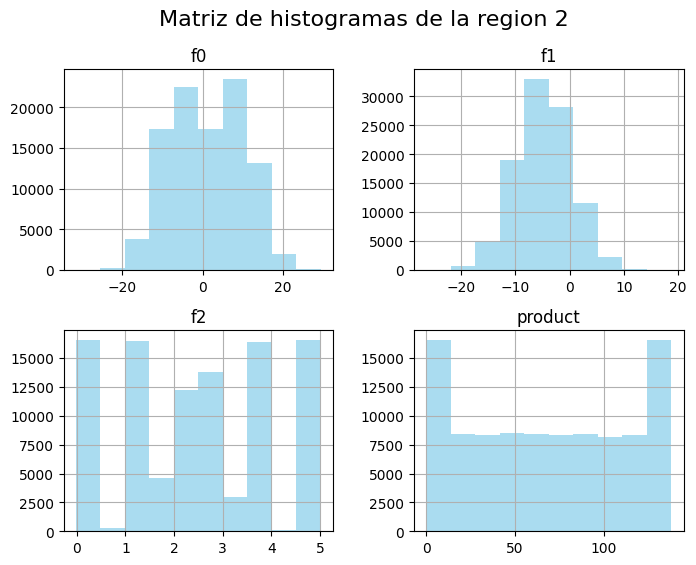

In [7]:
geo_1.hist(figsize=(8, 6), bins=10, color='skyblue', alpha=0.7)
plt.suptitle('Matriz de histogramas de la region 2', fontsize=16)  # Título global
plt.show()

 La distribucion f1, de la region 2, es similar a distribucion normal. En f2, hay un ligero sesgo negativo.

In [8]:
print('Region 3')
geo_2.describe()

Region 3


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


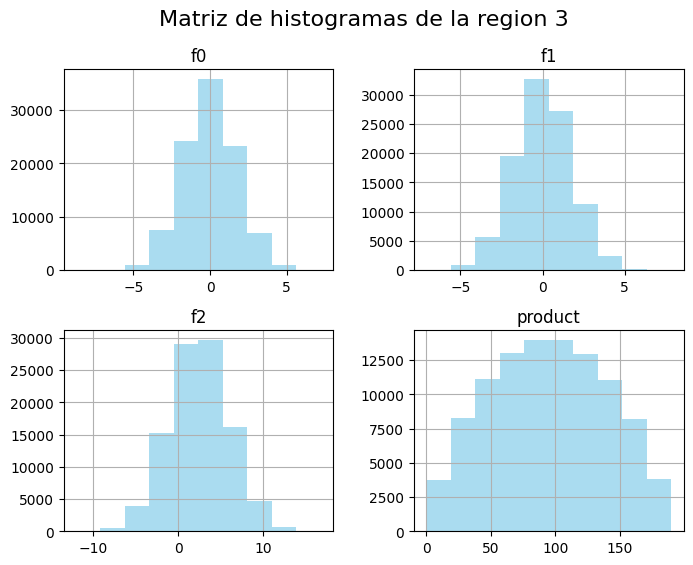

In [9]:
geo_2.hist(figsize=(8, 6), bins=10, color='skyblue', alpha=0.7)
plt.suptitle('Matriz de histogramas de la region 3', fontsize=16)  # Título global
plt.show()

En esta region, las cuatro variables muestran una distribucion  similar a la normal, con un pequeno sesgo negativo para f1 y f2. 

In [10]:
#------------Revision de valores nulos
print('--------------------------------------------------------------------------')
print('Region 1')
print(geo_0.isna().sum())
print('--------------------------------------------------------------------------')
print('Region 2')
print(geo_1.isna().sum())
print('--------------------------------------------------------------------------')
print('Region 3')
print(geo_2.isna().sum())

--------------------------------------------------------------------------
Region 1
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
--------------------------------------------------------------------------
Region 2
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
--------------------------------------------------------------------------
Region 3
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64


In [11]:
#---------------------------Revision de valores duplicados
print('--------------------------------------------------------------------------')
print('Suma de valores diplicados de la Region 1')
print(geo_0.duplicated().sum())
print('--------------------------------------------------------------------------')
print('Suma de valores diplicados de la Region 2')
print(geo_1.duplicated().sum())
print('--------------------------------------------------------------------------')
print('Suma de valores diplicados de la Region 3')
print(geo_2.duplicated().sum())

--------------------------------------------------------------------------
Suma de valores diplicados de la Region 1
0
--------------------------------------------------------------------------
Suma de valores diplicados de la Region 2
0
--------------------------------------------------------------------------
Suma de valores diplicados de la Region 3
0


En el analisis de cada region, no se encontro algun valor nulo, ni duplicado para alguna variable o fila.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Gran trabajo con la exploración inicial de los datos! Has incluido una revisión detallada del estado de los datos, abordando puntos clave como la detección de valores nulos, duplicados y la validación de tipos de datos. A continuación, destaco lo que hiciste bien:

- **Análisis Exploratorio:** El uso de `info()`, `describe()`, y la generación de histogramas proporcionan un panorama claro de la distribución y estructura de los datos en las tres regiones.
- **Validación de Calidad de Datos:** Confirmar que no hay valores nulos ni duplicados es un paso esencial para garantizar la calidad del análisis posterior.
- **Visualización de Distribuciones:** Los histogramas ayudan a identificar sesgos y similitudes con distribuciones normales, lo que es útil para decidir los próximos pasos en el análisis.

¡Excelente inicio para estructurar tu análisis y garantizar datos confiables! 😊
</div>


# Análisis de correlación entre las cuatro variables

In [12]:
correlacion = geo_0.corr()
print('Correlacion de las variables de la region 1:')
print(correlacion)

Correlacion de las variables de la region 1:
               f0        f1        f2   product
f0       1.000000 -0.440723 -0.003153  0.143536
f1      -0.440723  1.000000  0.001724 -0.192356
f2      -0.003153  0.001724  1.000000  0.483663
product  0.143536 -0.192356  0.483663  1.000000


In [13]:
correlacion = geo_1.corr()
print('Correlacion de las variables de la region 2:')
print(correlacion)

Correlacion de las variables de la region 2:
               f0        f1        f2   product
f0       1.000000  0.182287 -0.001777 -0.030491
f1       0.182287  1.000000 -0.002595 -0.010155
f2      -0.001777 -0.002595  1.000000  0.999397
product -0.030491 -0.010155  0.999397  1.000000


In [14]:
correlacion = geo_2.corr()
print('Correlacion de las variables de la region 3:')
print(correlacion)

Correlacion de las variables de la region 3:
               f0        f1        f2   product
f0       1.000000  0.000528 -0.000448 -0.001987
f1       0.000528  1.000000  0.000779 -0.001012
f2      -0.000448  0.000779  1.000000  0.445871
product -0.001987 -0.001012  0.445871  1.000000


En la region 2, la variable product muestra una fuerte correlacion positiva con f2, mientras que en las demas regiones es moderada potitiva. De la misma manera, f1 y f0, en la region 1 muestran una correlacion moderada negativa

## Estandarizacion de los datos

In [15]:
from sklearn.preprocessing import StandardScaler

# Crear el objeto StandardScaler
scaler = StandardScaler()

# Ajustar y transformar los datos
#geo_0[['f0', 'f1', 'f2', 'product']] = scaler.fit_transform(geo_0[['f0', 'f1', 'f2', 'product']])
#geo_1[['f0', 'f1', 'f2', 'product']] = scaler.fit_transform(geo_1[['f0', 'f1', 'f2', 'product']])
#geo_2[['f0', 'f1', 'f2', 'product']] = scaler.fit_transform(geo_2[['f0', 'f1', 'f2', 'product']])

In [16]:
geo_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [17]:
state=np.random.RandomState(54321)

# Entrenamiento de los datos con el modelo LinearRegression()

A continuacion, se construye la funcion entrenamiento, con la cual se segmentaran los datos fuente en  una proporcion 0.75 y 0.25 para las variables target y features, respectivamente. Para enseguida entrenarlos en el metodo LinearRegression(), calculando el rmse y volumen de los pozos de cada region, guardando los datos de la prediccion del modelo y el valor real como val_prediccion, val_real, respectivamente, en un Dataframe para cada region.

In [18]:
#declaracion de la funcion 
def entrenamiento(data, random=state):
    features = data.drop(columns=['product', 'id'])
    target = data['product']
    
    features_train, features_valid, target_train, target_valid =train_test_split(features, target, test_size=0.25, random_state=12345)
    
    model = LinearRegression()# inicializa el modelo
    model.fit(features_train, target_train) # entrena el modelo en el conjunto de entrenamiento
    predictions_valid = model.predict(features_valid) # obtén las predicciones del modelo en el conjunto de validación

    rmse = mean_squared_error(target_valid, predictions_valid, squared=False)
    print("RECM del modelo de regresión lineal en el conjunto de validación:", rmse)
    
    volume_mean = predictions_valid.mean()
    print('El volumen promedio es:', volume_mean)
    print('------------------------------------------------------------------------------------')
    
    print(features_train.shape, features_valid.shape)
    print(target_train.shape, target_valid.shape)
    print()
    
    
    result = pd.DataFrame(dict(val_prediccion=predictions_valid, val_real=target_valid))
    return result
    


In [19]:
region=['region_1', 'region_2', 'region_3']
dt=[geo_0, geo_1, geo_2]
predic_region= {}

In [20]:
for i, reg in zip(dt,region):
    predic_region[reg]= entrenamiento(i)

RECM del modelo de regresión lineal en el conjunto de validación: 37.5794217150813
El volumen promedio es: 92.59256778438035
------------------------------------------------------------------------------------
(75000, 3) (25000, 3)
(75000,) (25000,)

RECM del modelo de regresión lineal en el conjunto de validación: 0.893099286775617
El volumen promedio es: 68.728546895446
------------------------------------------------------------------------------------
(75000, 3) (25000, 3)
(75000,) (25000,)

RECM del modelo de regresión lineal en el conjunto de validación: 40.02970873393434
El volumen promedio es: 94.96504596800489
------------------------------------------------------------------------------------
(75000, 3) (25000, 3)
(75000,) (25000,)



In [21]:
predic_region 

{'region_1':        val_prediccion    val_real
 71751       95.894952   10.038645
 80493       77.572583  114.551489
 2655        77.892640  132.603635
 53233       90.175134  169.072125
 91141       70.510088  122.325180
 ...               ...         ...
 12581      103.037104  170.116726
 18456       85.403255   93.632175
 73035       61.509833  127.352259
 63834      118.180397   99.782700
 43558      118.169392  177.821022
 
 [25000 rows x 2 columns],
 'region_2':        val_prediccion    val_real
 71751       82.663314   80.859783
 80493       54.431786   53.906522
 2655        29.748760   30.132364
 53233       53.552133   53.906522
 91141        1.243856    0.000000
 ...               ...         ...
 12581      136.869211  137.945408
 18456      110.693465  110.992147
 73035      137.879341  137.945408
 63834       83.761966   84.038886
 43558       53.958466   53.906522
 
 [25000 rows x 2 columns],
 'region_3':        val_prediccion    val_real
 71751       93.599633   61.212

A continuacion se muestran los volumenes promedio reales y los obtenidos de la prediccion del modelo, enlistanlo los 200 primeros de cada region.

In [22]:
predic_region['region_1'].sort_values(by='val_prediccion')['val_real'].head(200)

1054      25.069622
89454     11.018692
232       46.546824
36172     25.956984
88683     49.374929
            ...    
38164     40.514170
8281      86.888107
79578    122.167315
80618     75.079435
83893     21.287112
Name: val_real, Length: 200, dtype: float64

In [23]:
predic_region['region_2'].sort_values(by='val_prediccion')['val_real'].head(200)

91386    0.0
1411     0.0
92993    0.0
97894    0.0
21570    0.0
        ... 
18705    0.0
61346    0.0
56488    0.0
45163    0.0
86121    0.0
Name: val_real, Length: 200, dtype: float64

In [24]:
predic_region['region_3'].sort_values(by='val_prediccion')['val_real'].head(200)

64669     32.496867
43845     57.022698
63325     62.903882
36323     60.244891
71479     33.411204
            ...    
26180     68.970048
268       62.572254
88383     27.796523
41304    130.227327
17018     64.279939
Name: val_real, Length: 200, dtype: float64

# Volumen de reservas en un pozo

A continuacion se calcula el beneficio minimo que debe generar cada pozo. Para calcular las ganancias, seguiremos las condiciones establecidas por la empresa OilyGiant: durante la exploración de la región se realiza un estudio en 500 puntos, de los cuales se seleccionan los mejores 200 para el cálculo del beneficio; el presupuesto para desarrollar estos 200 pozos petroleros es de 100 millones de dólares; además, cada barril de materia prima genera ingresos de 4.5 USD, y el ingreso por unidad de producto es de 4500 dólares, considerando que el volumen de reservas se expresa en miles de barriles.
Las variables usadas son:
budget- el presupuesto total para los 200 barriles
income- ingreso por unidad de producto
quantity - cantidad de pozos 
revenue_min-ganancia por unidad de producto (en dólares)
vol_min_ind-volumen minimo por pozo

Calculo del volumen minimo que debe tener cada pozo

In [25]:
budget=100_000_000
income=4500
quantity =200

In [26]:
revenue_min=budget/quantity # beneficio minimo que debe tenerse por pozo
revenue_min

500000.0

In [27]:
vol_min_ind=revenue_min/income    #volumen minimo que debe tener cada pozo
print('El volumen minimo que debe tener cada pozo es: ', vol_min_ind)

El volumen minimo que debe tener cada pozo es:  111.11111111111111


A continuacion se seleccionaran las mejores 200 predicciones del modelo para cada una de las regiones. La funcion best_options ordena los resultados del volumen de la prediccion, seleccionando los 200 mas grandes, suma los ingresos totales restando el presupuesto total para obtener la ganancia total por los 200 pozos en cada region.

In [28]:

def best_options(resuls_model):
    best_results=resuls_model.sort_values(by='val_prediccion', ascending=False)['val_real'].head(200)
    best_results_total = best_results.sum()
    gain_total=(best_results_total*income)-budget
    return gain_total

In [29]:
print('El mayor beneficio por pozo, de la region 1 es:', best_options(predic_region['region_1']))

El mayor beneficio por pozo, de la region 1 es: 33208260.43139851


In [30]:
print('El mayor beneficio por pozo, de la region 2 es:', best_options(predic_region['region_2']))

El mayor beneficio por pozo, de la region 2 es: 24150866.966815114


In [31]:
print('El mayor beneficio  por pozo, de la region 3 es:', best_options(predic_region['region_3']))

El mayor beneficio  por pozo, de la region 3 es: 27103499.635998324


Hasta aqui, se ha calculado el beneficion que se tendria de cada region por los 200 pozos. De acuerdo con los resultados anteriores, la region 1 tiene un mayor beneficio. Tambien, las tres regiones, en promedio, superan el valor minimo del volumen minimo que debe tener cada uno.

con la funcion stress_model vamos a estresar los resultados anteriores. Será necesario calcular el beneficio total de cada region, utilizando submuestras (con reemplazo) y considerando 500 puntos analizados durante la exploración de cada región.

In [32]:
def stress_model(resuls_model, count=1000):
    values_localization = []
    for i in range(count):
        local = resuls_model.sample(n=500, replace = True, random_state=state)
        values_localization.append(best_options(local))
        
    values_localization= pd.Series(values_localization)
    
    return values_localization

In [33]:
stress_model_1 = stress_model(predic_region['region_1'])

In [34]:
stress_model_2 = stress_model(predic_region['region_2'])

In [35]:
stress_model_3 = stress_model(predic_region['region_3'])

Los valores promedio del revenue de las tres regiones son:

In [36]:
print('Reserva 1:', stress_model_1.mean())
print('Reserva 2:', stress_model_2.mean())
print('Reserva 3:', stress_model_3.mean())

Reserva 1: 3920829.088547083
Reserva 2: 4604869.8247138085
Reserva 3: 3964626.5656833537


Luego del analisis, observamos que, la Región 2 tiene el beneficio promedio mayor, registrando 4.6 millones de dólares en ganancias

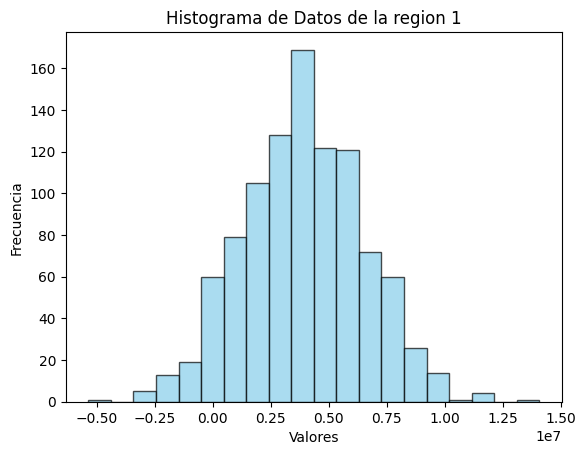

In [37]:
plt.hist(stress_model_1, bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Agregar etiquetas y título
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma de Datos de la region 1')

# Mostrar el gráfico
plt.show()

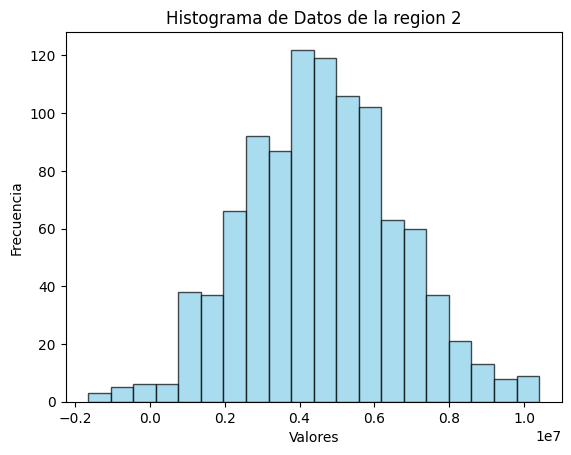

In [38]:
plt.hist(stress_model_2, bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Agregar etiquetas y título
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma de Datos de la region 2')

# Mostrar el gráfico
plt.show()

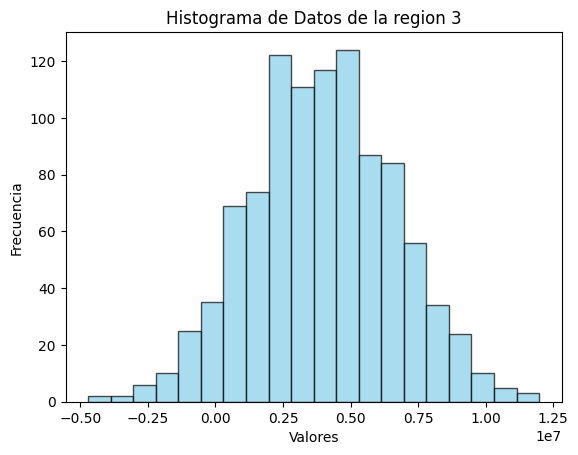

In [39]:
plt.hist(stress_model_3, bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Agregar etiquetas y título
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma de Datos de la region 3')

# Mostrar el gráfico
plt.show()

Conforme a lo hallado en los histogramas, las regiones 1 y 3 muestran mas ganancias negativas que la region 2.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
<s>
<b>A resolver</b> ❗ - Hola Ann, gracias por tu esfuerzo en realizar este proyecto. Sin embargo, al revisar tu trabajo, he notado que no se siguieron las instrucciones del brief de manera adecuada. Es importante que revises cuidadosamente el brief, ya que proporciona una guía estructurada para completar el proyecto.

### Resumen del brief:
1. **Preparación de los datos:** Cargar, limpiar y analizar los datos de tres regiones.
2. **Entrenamiento del modelo:** Utilizar regresión lineal exclusivamente para predecir el volumen de reservas en los pozos.
3. **Evaluación de resultados:** Dividir los datos en entrenamiento y validación, calcular el RMSE y analizar los volúmenes promedio predichos.
4. **Cálculo de beneficios:** Seleccionar los 200 pozos con mayores predicciones y calcular el beneficio total por región.
5. **Análisis de riesgos:** Implementar la técnica de bootstrapping para calcular el beneficio promedio, intervalos de confianza del 95%, y el riesgo de pérdidas.
6. **Conclusión:** Seleccionar la región más rentable considerando el beneficio y el riesgo (riesgo de pérdida <2.5%).

### Observaciones sobre tu proyecto:
- **Faltaron pasos clave:** No se realizaron los cálculos de beneficios de manera completa ni se implementó el análisis de riesgos con bootstrapping.
- **Análisis incompleto:** El proyecto no incluye intervalos de confianza ni evaluación del riesgo de pérdida, puntos esenciales para la selección de la región.
- **Estructura:** El proyecto no está organizado ni se alinea con los pasos descritos en el brief.

### Próximos pasos:
Para apoyarte en este proceso, te muestro un proyecto completado (sin código) para que tengas una idea clara de lo que se espera. Te recomiendo revisar el brief con calma y reorganizar tu trabajo siguiendo las instrucciones. ¡Estoy seguro de que puedes hacerlo!

                                                                                                                 Muestra del proyecto: https://iridescent-hummingbird-8fa9b3.netlify.app
                                                                                                                       
                                                                                                                       
</div>

In [53]:
#calculo del porcentaje de error de cada region
def metricas(beneficios, region):
    nivel_confianza = 0.99
    alpha = 1 - nivel_confianza
    interv_minimo = beneficios.quantile(alpha/2)
    interv_maximo = beneficios.quantile(1-alpha/2)
    promedio_beneficio = beneficios.mean()
    perdida = ((beneficios < 0).mean()) * 100
    print(f'Mi intervalo de confianza al {nivel_confianza} % tiene un rango de: {interv_minimo}-{interv_maximo}') 
    print (f'El margen bruto promedido de la region {region} es de: {promedio_beneficio}')
    print(f'El % riesgo o perdida de {region} es de: {perdida}%')
          

In [54]:
metricas(stress_model_1, 'region_1')

Mi intervalo de confianza al 0.99 % tiene un rango de: -2454176.4015568984-11094780.611411288
El margen bruto promedido de la region region_1 es de: 3920829.088547083
El % riesgo o perdida de region_1 es de: 6.4%


In [55]:
metricas(stress_model_2, 'region_2')

Mi intervalo de confianza al 0.99 % tiene un rango de: -511323.33716050256-10056384.775091514
El margen bruto promedido de la region region_2 es de: 4604869.8247138085
El % riesgo o perdida de region_2 es de: 1.3%


In [56]:
metricas(stress_model_3, 'region_3')

Mi intervalo de confianza al 0.99 % tiene un rango de: -2870533.3172077183-10573061.385765284
El margen bruto promedido de la region region_3 es de: 3964626.5656833537
El % riesgo o perdida de region_3 es de: 6.3%


Finalmente, con base en el analisis realizado, la region 2 tiene el menor porcentaje de perdida, con una ganancia de 4.6 millones de dolares. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Felicidades! Tu proyecto está **aprobado**. Has demostrado un excelente manejo de los datos, análisis exploratorio, y creación de modelos predictivos. A continuación, destaco los puntos positivos y algunas áreas interesantes para seguir investigando:

### **Puntos Positivos:**
- **Análisis Exploratorio:** Has realizado una exploración detallada de los datos, incluyendo histogramas y correlaciones, lo cual permite una buena comprensión de las variables.
- **Entrenamiento del Modelo:** La implementación de la regresión lineal y los cálculos de RMSE están correctamente realizados, mostrando un entendimiento sólido de los conceptos.
- **Estandarización y Funciones:** Las funciones creadas para el entrenamiento y análisis de datos están bien estructuradas y organizadas, lo cual es una práctica clave en proyectos escalables.

### **Áreas para Seguir Investigando:**
- **Intervalos de Confianza:** Aunque aplicaste técnicas de estrés, sería interesante incluir intervalos de confianza detallados para respaldar mejor las decisiones de inversión.
- **Visualización:** Incorporar gráficos adicionales como boxplots o heatmaps podría enriquecer el análisis y la interpretación de los resultados.
- **Optimización de Código:** Algunos bloques de código pueden refactorizarse para mayor eficiencia, como el cálculo de métricas y la evaluación de modelos.

### **Recomendación Extra:**
Considera integrar técnicas avanzadas como Regularización (Ridge o Lasso) en futuros proyectos para mejorar la robustez de las predicciones.

¡Sigue así, estás haciendo un gran trabajo! 💪🚀😊
</div>